In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [2]:
def stringfied_list_to_list(df, col):
    return df[col].apply(lambda x: eval(x))

In [3]:
SEED = 1992

In [207]:
# Read df
df = pd.read_csv('datasets/dataframes/allrecipes_full_preproc.csv')

In [208]:
target_column = 'rating_score'

nutrient_columns = ['calories', 'fat', 'carbs', 'protein', 'cholesterol', 'sodium']
recipe_columns = ['prep_time', 'number_of_steps', 'number_of_ingredients']
social_columns = ['photos']
category_column = ['main_category']

features_columns = nutrient_columns

In [209]:
df["categories_list"] = stringfied_list_to_list(df, "categories_list")
df['number_of_categories'] = df.categories_list.apply(len)
df['main_category'] = df[df.number_of_categories!=0].categories_list.apply(lambda x: x[0])
df['secondary_category'] = df[df.number_of_categories>1].categories_list.apply(lambda x: x[1])

In [210]:
categories_df = df.groupby(['main_category', 'secondary_category']).size().reset_index()

In [211]:
categories_df[categories_df.main_category=='Drinks']

,main_category,secondary_category,0
50,Drinks,Beer,1
51,Drinks,Cider,11
52,Drinks,Cocktails,201
53,Drinks,Coffee,30
54,Drinks,Eggnog,7
55,Drinks,Hot Chocolate,22
56,Drinks,Juice,15
57,Drinks,Lemonade,25
58,Drinks,Liqueurs,9
59,Drinks,Mocktails,12


In [212]:
df=df[df.main_category=='Drinks']

In [213]:
X = df[features_columns]
X = X.dropna()
X = X.drop(columns='cholesterol')

In [214]:
X.isna().sum()

calories    0
fat         0
carbs       0
protein     0
sodium      0
dtype: int64

In [206]:
df.head()

,recipe_name,description,ingredients_list,categories_list,calories,fat,carbs,protein,cholesterol,sodium,...,reviews,photos,steps,made_it,page_format,number_of_categories,main_category,number_of_steps,number_of_ingredients,secondary_category


In [198]:
X.quantile([0.01,0.05,0.35, 0.5,0.75,0.95, 0.99])

,calories,fat,carbs,protein,sodium
0.01,NaN,NaN,NaN,NaN,NaN
0.05,NaN,NaN,NaN,NaN,NaN
0.35,NaN,NaN,NaN,NaN,NaN
0.50,NaN,NaN,NaN,NaN,NaN
0.75,NaN,NaN,NaN,NaN,NaN
0.95,NaN,NaN,NaN,NaN,NaN
0.99,NaN,NaN,NaN,NaN,NaN


In [199]:
X = np.log(X+0.0001)

In [200]:
X.quantile([0.01,0.99])

,calories,fat,carbs,protein,sodium
0.01,NaN,NaN,NaN,NaN,NaN
0.99,NaN,NaN,NaN,NaN,NaN


In [201]:
X.shape

(0, 5)

In [178]:
z_scores = np.abs(stats.zscore(X))

In [179]:
X_wo_out = X[(z_scores<3).all(axis=1)]

In [180]:
X_wo_out.shape

(628, 5)

In [181]:
from sklearn.preprocessing import StandardScaler
# the scaler object (model)
scaler = StandardScaler()# fit and transform the data
X_wo_out_scaled = scaler.fit_transform(X_wo_out) 

In [182]:
X_wo_out_scaled = pd.DataFrame(X_wo_out_scaled, columns=X.columns) 

In [183]:
for n_clusters in [3,4,5,6,7,9,11,13,15]:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_wo_out_scaled)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_wo_out_scaled, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 3, silhouette score is 0.27159167609230145)
For n_clusters = 4, silhouette score is 0.23755589240154598)
For n_clusters = 5, silhouette score is 0.26084607454820663)
For n_clusters = 6, silhouette score is 0.25396610581178725)
For n_clusters = 7, silhouette score is 0.2625229132969797)
For n_clusters = 9, silhouette score is 0.2183134699435591)
For n_clusters = 11, silhouette score is 0.22302333114339934)
For n_clusters = 13, silhouette score is 0.22092860184446947)
For n_clusters = 15, silhouette score is 0.21435824685089752)


In [108]:
y_kmeans.shape

NameError: name 'y_kmeans' is not defined

In [184]:
clusterer = KMeans(n_clusters=5)
preds = clusterer.fit_predict(X_wo_out_scaled)
centers = clusterer.cluster_centers_


In [185]:
centers[:, 3]

array([-1.88103263,  0.15438017,  0.04194608, -0.55635506,  0.86845753])

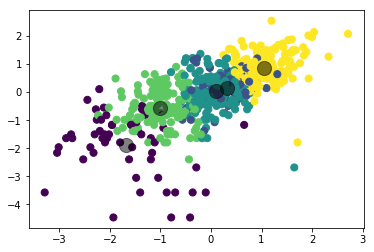

In [186]:
plt.scatter(X_wo_out_scaled.iloc[:, 0], X_wo_out_scaled.iloc[:, 3], c=preds, s=50, cmap='viridis')

centers = clusterer.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 3], c='black', s=200, alpha=0.5);

In [187]:
a=clusterer.cluster_centers_
a = pd.DataFrame(clusterer.cluster_centers_, columns=X.columns)
a

,calories,fat,carbs,protein,sodium
0,-1.672632,-1.815552,-1.173416,-1.881033,-1.531944
1,0.310470,0.731458,-0.466858,0.154380,-1.069399
2,0.092441,-0.080978,0.332321,0.041946,0.341795
3,-1.017716,-0.607127,-0.948926,-0.556355,-0.478954
4,1.046651,0.792524,0.904477,0.868458,0.871477


In [188]:
X_wo_out['cluster'] = preds

/home/juan/anaconda3/envs/jmb_ds_projects/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [189]:
full_df = X_wo_out.join(df['secondary_category'])

In [190]:
full_df[full_df.cluster==2].groupby('secondary_category').size()

secondary_category
Cakes                    12
Candy                     5
Chocolate                 4
Cobbler                   6
Cookies                  15
Crisps and Crumbles       2
Custards and Puddings    14
Frostings and Icings      6
Frozen Desserts           5
Fruit Desserts           72
Nut Desserts              6
Pies                     22
Specialty Desserts        8
dtype: int64

In [193]:
full_df[full_df.secondary_category=='Candy'].groupby('cluster').size()

cluster
0    3
1    1
2    5
3    7
dtype: int64